# Ejercicio Block Cipher

# Librerías y útil

In [36]:
from Crypto.Cipher import DES, DES3, AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Generación una función cifrado y descifrado DES

In [40]:
def padding(text):
    """Rellena el texto con espacios hasta que sea múltiplo de 8 bytes."""
    while len(text) % 8 != 0:
        text += b' '
    return text

def generateDESkey():
    """Genera una llave aleatoria de 8 bytes para DES."""
    return bytes([random.randint(33, 255) for _ in range(8)])

def encryptDES(text, key):
    """Cifra un mensaje usando DES en modo ECB."""
    cipher = DES.new(key, DES.MODE_ECB)
    message = padding(text.encode())
    return cipher.encrypt(message)

def decryptDES(ciphertext, key):
    """Descifra un mensaje usando DES en modo ECB."""
    cipher = DES.new(key, DES.MODE_ECB)
    message = cipher.decrypt(ciphertext)
    return message.rstrip(b' ').decode()

In [41]:
mensaje = """The DES block cipher is a 16-round Feistel network with a block length of
64 bits and a key length of 56 bits. The same round function ˆ f is used in each
of the 16 rounds. The round function takes a 48-bit sub-key and, as expected
for a (balanced) Feistel network, a 32-bit input (namely, half a block). The
key schedule of DES is used to derive a sequence of 48-bit sub-keys k1, . . . , k16
from the 56-bit master key.
"""
llave = generateDESkey()
cifrado = encryptDES(mensaje, llave)
print("Mensaje cifrado:", cifrado)
descifrado = decryptDES(cifrado, llave)
print("Mensaje descifrado:", descifrado)

Mensaje cifrado: b"F\xff\xb5}\xe3O\x8f\x12rF \xf0\xe24\x94K\xb3\x06t\xdf\xa3\x13\xba\x0ey\xc3\xe5\xd6\xfe\x8b.aC\xed*\xf8\x7f\x91\xa8v\xfc\xf2\xc9\xd5\xff\xd5\x9d\x03\xd7\xcew\x06s\x83\xf2\xfd\x19\xb6\xc1b\xd3\\\xbf\xbc\xaf\x18\xca,\xa0ud'\x9dr\x90\xaf\xae\x90\x1a\x80\x8d\xa7\xa3-\xf0\xe6\x8b\xb8\x13\x7f\x14\rm \t>\xc1\xf1\xe02?\xf8\x02\xe1\x03\xf6U\xa2\xb0Z\x9d\xbc\x86G\xa2\xcf\x8b\x91\x02\xd8\xafH\xc2_\x97\x97\xdf\xcaw\xd1\x15G\xb9\xd9K-V\x8d\x04\xf0\xc4N\x19-\xb3\xd9\x9c\x9ee\xe6\xd2\x89\xdfCB\x0e\xd0o\xfa\xc5;i\xb4d\x80\xde9\xb4\xcc\xa1m\xc8r\x8e\xce\x8bg\\q\xd45P\xe4 \x03\xcb\xa6-\x8c\xd2\x1e\xacd,\x80\x92n\xfdc~\x0e\x19\x99\xf6\x03\xd2\xfc\xabm\xfe\xb6b\\\xe5\x81c#!\xd1\xbc\x9e*\xc7H\xfdx\x12\x02B\xbeVU\x106\xccjr*\xcb\xf4\xcf\x1f>_\x81\x9d\xa1\x88\x807c\xe4\xdf\x958\xfd\xe5$\xad8VL\x93\x97\xc3v\xdb{t\x92\xb8\xdag\xfe\x02\xe6l\x0f\xa4\x00\x94qn\x9d\r\x83F\x18\x8dU=t\xd4O\xa2\xa6>\x85\xade\xfeJ\xb1}P\xfe\x8ekw\xd1\xa4\xa3H\xfciK\xa7\xa9\xb7<xS\xd5\x10\xb4j\x83\xf9\xa1\x92\xbc#\xf6

# Generación una función cifrado y descifrado 3DES

In [42]:
def generate3DESkey():
    """Genera una llave aleatoria de 24 bytes para 3DES."""
    while True:
        try:
            key = DES3.adjust_key_parity(get_random_bytes(24))
            return key
        except ValueError:
            continue

def encrypt3DES(text, key):
    """Cifra un mensaje usando 3DES en modo CBC."""
    iv = get_random_bytes(8)
    cipher = DES3.new(key, DES3.MODE_CBC, iv)
    message = pad(text.encode(), DES3.block_size)
    return iv + cipher.encrypt(message)

def decrypt3DES(ciphertext, key):
    """Descifra un mensaje usando 3DES en modo CBC."""
    iv = ciphertext[:8]
    cipher = DES3.new(key, DES3.MODE_CBC, iv)
    message = unpad(cipher.decrypt(ciphertext[8:]), DES3.block_size)
    return message.decode()

In [43]:
mensaje = """The main weakness of DES is its short key. It thus makes sense to try to
design a block cipher with a larger key length using DES as a building block.
Some approaches to doing so are discussed in this section. Although we refer
to DES frequently throughout the discussion, and DES is the most prominent
block cipher to which these techniques have been applied, everything we say
here applies generically to any block cipher.
"""
llave = generate3DESkey()
cifrado = encrypt3DES(mensaje, llave)
print("Mensaje cifrado:", cifrado)
descifrado = decrypt3DES(cifrado, llave)
print("Mensaje descifrado:", descifrado)

Mensaje cifrado: b"\x8d\xe3m\xe5\xb2\x92\xbe\xc1\x15<>\xfb\x90\xfb\x97\xb4\xb0\x00>,\x92\x15\xea_\xcd&\xba\x91\xe0\xc9\x9d\xcaFR\x03\xba*Q\x0e%z\x8e\xee\t0'4\x17\x1e\x12\x7f\x86\x17\x11\x8a\x9c\xb2\xb0\x15s\xb2\xc45\xdd\x9eSg\xba\x15\xc8<\xb4 \xbb\r4\x82\x08/\x88\xa7\x8dk\xda\x00\x1ee\xef\xfb\x7fI\xc0\xf1\xa5|\xde\xf8+\x0c-\x19\x81\x05\xdbI\x0f\x8fv\n%\x07\xbe\x9d\xc7xQ\xddn2e\xf0,\xac\xdb\xc1R\x03\x90h\xcd\r)Z}\xd8\xb3uo\xaas\xdf\xd0{e\x14\xe6\xe4<a\xe0\xbf\x0b$\xd7\xcc\xcd\x14\x08\xeci@\x03\x88\x86\x883\xd2J@\xd9N\r\x8c\x9au?\x81\xd9'\xde\x1d\x17E\xd9rZ\xff\x04\xb0\x07\xc8\xf3\x14\xd7\xb2'qu\xb0\xd6\xa9\xefr\x81#h\xe9*\xad\x1c\x87\xeas\xd4!\x15\xca\x8f*\x92d\xc3-\xee9\xd4\x14Q\xfd\x85\xce\xcb\xa0(\xda#(V3a_\x1f|\xc6\x04\xba4\x86\xd9\xeco\xafk\xafn\x19\xbb\x00\x8d\x01\x1cA\xec\x8ee\xa1v\x18\x12\xf0\xc5\x93\x97'\xda\xcb\x87\x17\xd6\x1c\xbcr\xb6\xe0|\xff\x9f\xb6(\xb5\xc3\x97\xd1m\xc6\xbaz\x94\xd7\xe5\xcb\xe2T\x07\xb8\xa9\x86\xef\x91H\x08\x0fq\xd4*\x0c\xcd\xc6\x8b\x9a\xd4o\xfc\x10\x08\x0

# Generación una función cifrado y descifrado AES con CBC Y ECB

In [37]:
def generateAESkey():
    """Genera una llave aleatoria de 32 bytes para AES."""
    return get_random_bytes(32)

def encryptAES(plaintext, key, mode):
    """Cifra un mensaje usando AES en modo ECB o CBC."""
    if mode == "ecb":
        cipher = AES.new(key, AES.MODE_ECB)
        ciphertext = cipher.encrypt(pad(plaintext, AES.block_size))
        return ciphertext
    elif mode == "cbc":
        iv = get_random_bytes(16)
        cipher = AES.new(key, AES.MODE_CBC, iv)
        ciphertext = cipher.encrypt(pad(plaintext, AES.block_size))
        return iv + ciphertext

def decryptAES(ciphertext, key, mode):
    """Descifra un mensaje usando AES en modo ECB o CBC."""
    if mode == "ecb":
        cipher = AES.new(key, AES.MODE_ECB)
    elif mode == "cbc":
        iv = ciphertext[:16]
        cipher = AES.new(key, AES.MODE_CBC, iv)
    message = unpad(cipher.decrypt(ciphertext[16:] if mode == "cbc" else ciphertext), AES.block_size)
    return message.decode()

def readImage(imagePath):
    """Lee una imagen y la convierte en bytes."""
    with Image.open(imagePath) as img:
        img = img.convert("RGB")
        imgArray = np.array(img)
        imgBytes = imgArray.tobytes()
    return imgBytes, imgArray.shape

def encryptImage(imagePath, key, mode, outputPath):
    """Cifra una imagen con AES en modo ECB o CBC."""
    imgBytes, imgShape = readImage(imagePath)
    cipher = encryptAES(imgBytes, key, mode)

    encryptedArray = np.frombuffer(cipher[:np.prod(imgShape)], dtype=np.uint8)
    encryptedArray = encryptedArray.reshape(imgShape)

    encryptedImg = Image.fromarray(encryptedArray)
    encryptedImg.save(outputPath)

    plt.imshow(encryptedImg)
    plt.axis('off')
    plt.show()

In [31]:
mensaje = b"Hola, mundo!"
llave = generateAESkey()

# AES ECB
cifradoECB = encryptAES(mensaje, llave, "ecb")
print("Mensaje cifrado (ECB):", cifradoECB)
descifradoECB = decryptAES(cifradoECB, llave, "ecb")
print("Mensaje descifrado (ECB):", descifradoECB)

# AES CBC
cifradoCBC = encryptAES(mensaje, llave, "cbc")
print("Mensaje cifrado (CBC):", cifradoCBC)
descifradoCBC = decryptAES(cifradoCBC, llave, "cbc")
print("Mensaje descifrado (CBC):", descifradoCBC)

Mensaje cifrado (ECB): b'po\x0fD\xdcP\xa2-\xa3-g\x9at\xf5\x17-'
Mensaje descifrado (ECB): Hola, mundo!
Mensaje cifrado (CBC): b'v=OKhvz\xdf \xdb\x1e\x07\x06\xda\x06\x074\xd2\x85\x03\x97\xbehs\xe7j=\xbc\x95.B\xc4'
Mensaje descifrado (CBC): Hola, mundo!


Cifrando imagen en modo ECB...


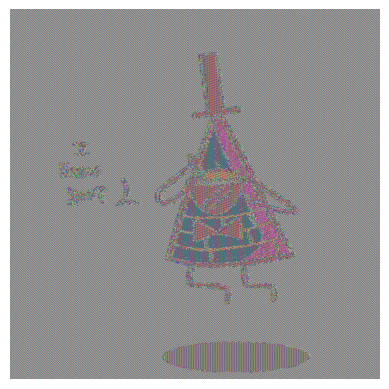

Cifrando imagen en modo CBC...


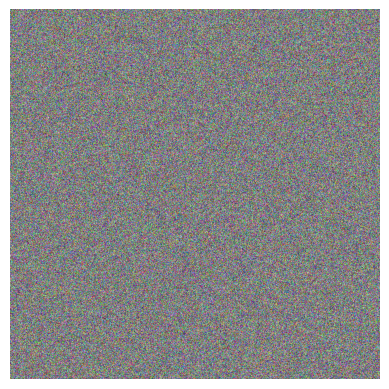

In [39]:
key = generateAESkey()
image = "pic.png"
imageECB = "imageECB.png"
imageCBC = "imageCBC.png"

# Cifrado en modo ECB
print("Cifrando imagen en modo ECB...")
encryptImage(image, key, "ecb", imageECB)

# Cifrado en modo CBC
print("Cifrando imagen en modo CBC...")
encryptImage(image, key, "cbc", imageCBC)

# Preguntas a Responder

## ¿Qué tamaño de clave se está usando para DES, 3DES y AES?

**DES:** Usa una clave de 8 bytes, de los cuales solo 56 bits son realmente la llave, ya que 1 bit de cada byte se usa como bit de paridad.

**3DES:** Usa 3 claves DES concatenadas. Para una llave de 24 bytes. La cuál, obviamente se divide en las 3 llaves de 8 bytes las cuales se comportan como el DES normal.

**AES:** Usa una llave de 32 bytes, lo cual hace que el cifrado se realice en 14 rondas.

## ¿Qué modo de operación está implementado?

**DES:** Se implementó en modo Electronic Codebook (ECB), haciendo que cada bloque se cifre de manera independiente.

**3DES:** Se implementó en modo Cipher Block Chaining (CBC), haciendo que a cada bloque se le aplique un XOR con el bloque anterior antes de realizar el cifrado.

**AES:** Se implementó en ambos modos anteriores, ECB y CBC.

## ¿Por qué no debemos usar ECB en datos sensibles?

Debido a que el modo ECB realiza los cifrados por bloque de manera independiente para cada uno. Provocando dos grandes problemas, el primero y más riesgoso, es la alta probabilidad de dejar patrones repetidos, permitiendo un análisis de frecuencias. Lo cuál a su vez provoca el otro problema, ya que este modo no utiliza un vector de incialización (IV) no contiene aleatoriedad en sus cifrados, una misma entrada siempre hará una misma salida.

## ¿Cual es la diferencia entre ECB vs CBC, se puede notar directamente en una imagen?

Tomando en cuenta lo que se explicó en la respuesta anterior, a diferencia de ECB, CBC requiere un IV y añadido a eso cada bloque se combina con el bloque anterior. Haciendo que el cifrado aparte de contar con aleatoriedad, cuente con un juego de datos doble al tener que un bloque dependa del anterior. ECB, como se mencionó, mentiene patrones, y se puede observar en la imagen en el apartado de AES fácilemente ya que se muestra la figura original, debido a que se cifran los bloques de manera independiente y que ninguno ocupa un IV. Por otra parte, CBC distribuye la aleatoriedad y el cifrado mismo en cada bloque, eliminando cualquier patrón en el mensaje cifrado. Y se puede ver en la imagen cifrada con CBC en el apartado de AES, que la imagen no cuenta con ninguna sombra ni figura que indique cómo era la imagen original.

## ¿Que es el IV?

Es un vector de inicialización (Initialization Vector) que tiene como función principal el introducir aleatoriedad en los cifrados. Haciendo que aunque exista una entrada idéntica a otra, los cifrados (salidas) producidos sean completamente distintos.

## ¿Que es el PADDING?

Se utiliza para "obligar" que la longitud de los datos de entrada sean mútiplo del tamaño del bloque del cifrado. El padding corresponde a la cantidad de datos adicionales que se ocuparon para hacer que la condición anterior se cumpla.

## ¿En qué situaciones se recomienda cada modo de operación?

ECB es ideal para la transmisión de datos de manera rápida y simple, siempre y cuando los datos no sean sensibles. CBC para los escenarios donde la rapidez de transmisión no sea problema y que se desee proteger información sensible. CTR podría verse como los escenarios donde CBC no cumple debido a su velocidad, ya que CTR al ser paralelizable puede aplicarse de manera eficiente. CFB podría verse como CTR pero donde la cantidad de datos no es grande, sino para cifrado de pequeños bloques de datos. OFB es ideal para transmisión de datos en tiempo real, donde es necesario un flujo de datos constantes. GCM al estar inspirado y basado en CTR es ideal para los escenarios donde se requiere protección de datos sensibles y se busca confirmar la integridad de los datos al tener una autenticación.

## ¿Cómo elegir un modo seguro en cada lenguaje de programación?

Se puede seleccionar un modo seguro en cada lenguaje de programación investigando librerías que ofrezcan distintos modos seguros de generar llaves, la clave es la aleatoriedad y la manipulación de el mensaje plano y la llave. Además de la selección del modo de operación correcto.

Para estos lenguajes se recomiendan:
- Python: pycryptodome
- Java: javax.crypto
- Go: crypto/aes, crypto/cipher
- C#: System.Security.Cryptography

# Pruebas unitarias

In [49]:
# Pruebas unitarias generadas con ChatGPT https://chatgpt.com/share/67d3c036-cf84-8003-9cc2-8b3201e219ba

import unittest
class TestCrypto(unittest.TestCase):
    
    def test_DES(self):
        key = generateDESkey()
        text = "Hello123"
        encrypted = encryptDES(text, key)
        decrypted = decryptDES(encrypted, key)
        self.assertEqual(text, decrypted)
    
    def test_3DES(self):
        key = generate3DESkey()
        text = "Hello Triple DES!"
        encrypted = encrypt3DES(text, key)
        decrypted = decrypt3DES(encrypted, key)
        self.assertEqual(text, decrypted)
    
    def test_AES(self):
        key = generateAESkey()
        text = "AES Encryption Test"
        encrypted = encryptAES(text.encode(), key, "cbc")
        decrypted = decryptAES(encrypted, key, "cbc")
        self.assertEqual(text, decrypted)

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


# Reflexión

Aunque utilicemos algoritmos de cifrado en un modo de operación adecuado, nada nos asegura que la generación del IV (para el modo CBC) sea realmente algo aleatorio. Al utilizar librerías las cuales generan números/datos pseudoaleatorios no valdrá de nada que los algoritmos y sus modos hayan sido los correctos, ya que el cifrado no será realmente aleatorio. Como en este laboratorio, probablemente la función get_random_bytes de la librería PyCryptodome sea mejor que utilizar la de la librería random de python, nada nos asegura que se esté generando de manera aleatoria real. O al menos significativamente mejor que un pseudoaleatorio normal.